In [1]:
from sympy import *
import sympy as sp
from IPython.display import display, Math
from sympy.abc import a,x,y,m,n,r
from sympy.plotting import plot_parametric
from sympy.plotting import plot, PlotGrid
init_printing()

# $${\textbf{Assignment 1}}$$

#### Q1. Express $4P_4(x)-2P_3(x)+P_2(x)$ as a function of $x$. When $P_n(x)$ is the Legendre Polunomial of order $n$.

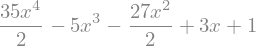

In [2]:
p2=sp.legendre(2, x)
p3=sp.legendre(3, x)
p4=sp.legendre(4, x)

expand(4*p4-2*p3+p2)

#### Q2. Find out the series expansion of $\large \frac{1}{sin(x)-cos(x)}$ upto 7th power of $x$. 

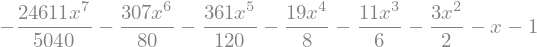

In [3]:
series((1/(sin(x) - cos(x))),x,0,8).removeO()

#### Q3.Find the second derivative of $P_n(x)$.

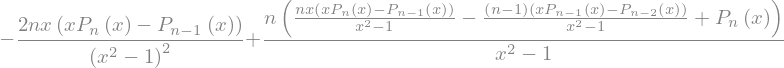

In [4]:
diff(diff(sp.legendre(n,x), x),x)

#### Q4. Use rewrite() method to express $\sin x \cos 3x$ as a linear combination of $e^{ikx}$ for different values of $k$.

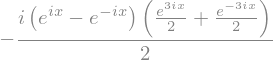

In [5]:
exp(I*x).expand(complex=True)
(sin(x)*cos(3*x)).rewrite(exp)

#### Q5.Find out $\lim_{x \rightarrow 0} x\cot x$

In [6]:
limit((x*cot(x)),x,0)

#### Q6. Find the maxima of the function $e^{-x^2}H_2(x)$ by equating the derivative to zero. $H_n(x)$ is the Hermite polynominal of order n. Check

Maxima:


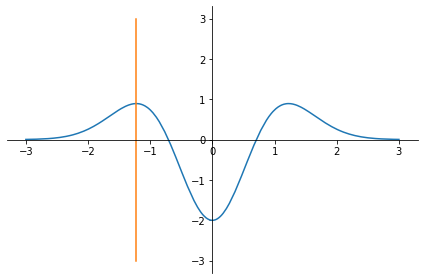

Maxima:


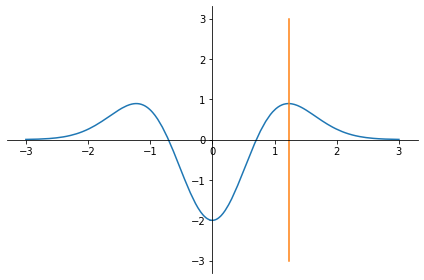

In [7]:
H2=exp(-x**2)*hermite(2, x)
p=solve((diff(H2,x)),x)
f2=diff(H2,x,2)

for i in (p):
    fn=f2.subs(x,i)
    if fn < 0:
        print("Maxima:")
        display(N(i))                
        plot_parametric((x,H2),(i,x),(x, -3, 3),)        

#### Q7. If $ {\large \psi} (x) = Ne^{-\frac{x^2}{2}}H_3(x)$, then normalize $\psi (x)$

normalization(N):


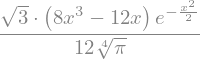

In [8]:
x = var('x')
psi= exp(-x*x/2)*sp.hermite(3,x)
I=integrate(psi*psi,(x, -oo, oo))
n=1/(sqrt(I))*psi
print("normalization(N):")
n

#### Q8. Assuming first Bohr radius ${\large{a}}_0 = 1,$ the $2'$s state wave function is given by $$\psi_{2s}(r,\theta,\phi) = \frac{1}{4\sqrt{2\pi}} (2-r) e^{-\frac{r}{2}}$$
#### Plot the wave function as a function of $r$.
#### Find the ratio of the probabilities of finding the electron in either side of the radial node (the value of $r$  where $\psi=0$).

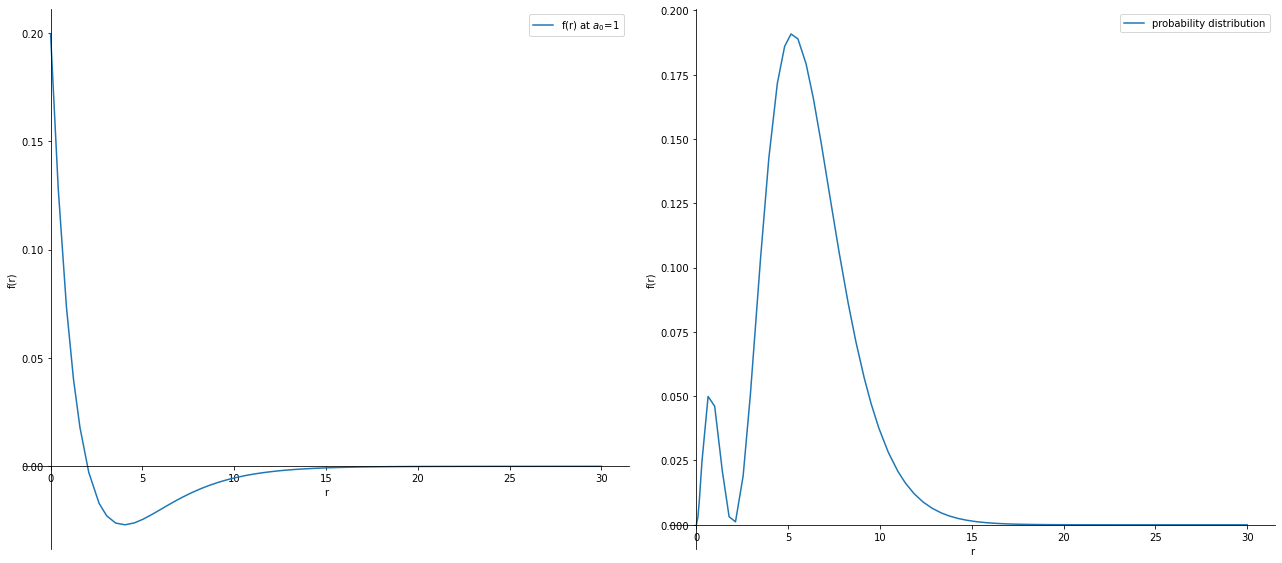

the ratio of the probabilities of finding the electron in either side of the radial node is :  0.0555794427043785


In [9]:
r = var('r')
a=(exp(-r/2)*(2-r)*(1/((16*2*pi)**0.5)))
r1=solve((a),r)
Fa=integrate(((r**2)*(a**2)),(r,r1,oo))
Fb=integrate(((r**2)*(a**2)),(r,0,r1))
Ff=Fb/Fa
s1=plot(a,(r,0,30),legend=True,label='f(r) at $a_0$=1',show=False)
s2=plot((4*pi*r*r*a*a),(r,0,30),legend=True,label='probability distribution',show=False)
PlotGrid(1,2,s1,s2,size=(18,8))
print("the ratio of the probabilities of finding the electron in either side of the radial node is : ",N(Ff))

#### Q9. Find the numerical values of the coordinates of points of intersection of two circles, both of radius 2 unit, but centers at (0,0) and (1,1).


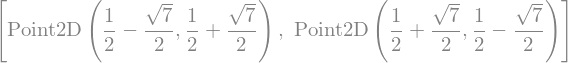

In [10]:
p1=Circle(Point2D(0,0),2)
p2=Circle(Point2D(1,1),2)
d=intersection(p1,p2)
display(d)
for i in (d):
    display(N(i,2))

#### Q10.Find the determinant and eigenvalues and eigenvectors of the matrix :$$\begin{bmatrix} x^2 & xy  \\ xy & y^3 \end{bmatrix}\quad$$

 Also find the numerical values of the eigenvalues at ($x,y$ )= ($1,2$) 

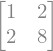

In [14]:
M=sp.Matrix([[x*x, x*y],[x*y, y*y*y]])
M

determinant :


eigenvalues :


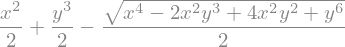

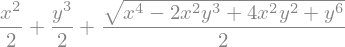

eigenvectors :


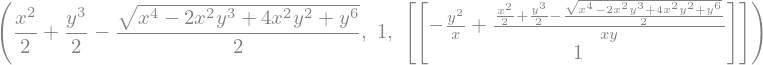

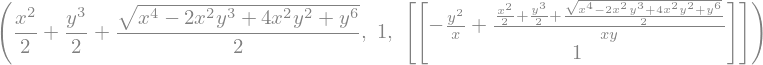

In [12]:
print('determinant :')
display(M.det())

print('eigenvalues :')
display(*M.eigenvals())

print('eigenvectors :')
display(*M.eigenvects())

In [13]:
x,y=1,2

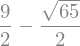

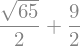

In [15]:
display(*M.eigenvals())

# $${\textbf{Assignment 2}}$$

### 1. Expand the first 5 terms of the expression $( x + y )^m$.

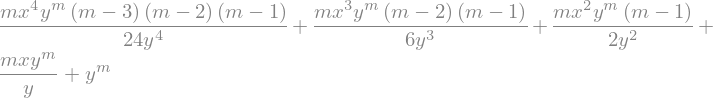

In [2]:
series(((x+y)**m),x,0,5).removeO()

### 2. Fibonacci Polynomials are defined as :

$ \\ F_1(x) = x,\qquad F_2(x) = x \qquad F_n(x) = xF_{n-1} + F_{n-2}(x),\qquad n>2$
   
   Use these definitions to find out $F_5(x)$ and $F_7(x)$. 
   Plot them in the interval $ x\in [-1,1] $  using two different colours.
           
           Use the function Fibbonacci(n,x) to generate the library function.

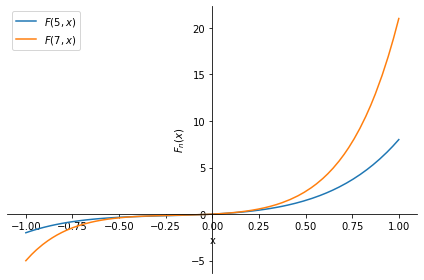

F(5,x): x**5 + x**4 + 3*x**3 + 2*x**2 + x 
F(7,x): x**7 + x**6 + 5*x**5 + 4*x**4 + 6*x**3 + 3*x**2 + x


In [3]:
def Fibbonacci(n,x):
    if (n==0):
        return x
    if (n==1):
        return x
    else:
        return simplify((Fibbonacci((n-1),x)*x) + (Fibbonacci((n-2),x)))
F5=Fibbonacci(5,x)
F7=Fibbonacci(7,x)
p5=plot(F5,(x,-1,1),show=False,legend=True,label=r'$F(5,x)$',ylabel=r'$F_{n}(x)$')
p7=plot(F7,(x,-1,1),show=False,legend=True,label=r'$F(7,x)$')
p5.extend(p7)
p5.show()
print(r'F(5,x):',expand(F5),'\n'+r'F(7,x):',expand(F7))

### 3. Use the function besselj(n,x) to generate $J_n(x)$.  Superpose $J_1(x),J_2(x),J_3(x)$ using different colours.

 Bessel functions of the first kind of integer orders : $ \displaystyle{ J_{p} (x) = \sum_{n=0}^\infty \frac{x^{2n+p}{(-1)^n}}{{2^{2n+p}}{n!}\Gamma{(p+n+1)}}}$

						 First order Bessel Function


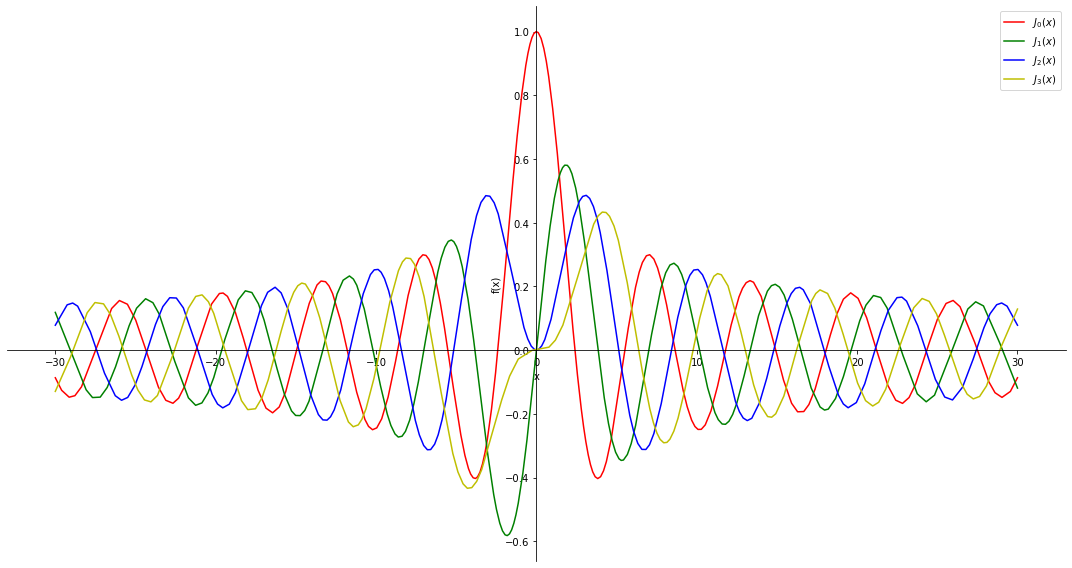

In [4]:
def besselj(p,x):
    return summation(((-1)**n*x**(2*n+p))/(factorial(n)*gamma(n+p+1)*2**(2*n+p)),[n,0,oo])

print("\t\t\t\t\t\t First order Bessel Function")
p0=plot(besselj(0,x),(x,-30,30),line_color='r',label=r'$J_{0}(x)$',legend=True,show=False,size=(15,8))    
p1=plot(besselj(1,x),(x,-30,30),line_color='g',legend=True,label=r'$J_{1}(x)$',show=False)  
p2=plot(besselj(2,x),(x,-30,30),line_color='b',legend=True,label=r'$J_{2}(x)$',show=False)
p3=plot(besselj(3,x),(x,-30,30),line_color='y',legend=True,label=r'$J_{3}(x)$',show=False)
p0.extend(p1)
p0.extend(p2)
p0.extend(p3)
p0.show()

### 4. Find out the series expansion of $J_1(x)$ and $J_2(x)$ upto 5 terms in each case.

Calculating J_1(x) for 5 terms.


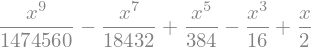

Calculating J_2(x) for 5 terms.


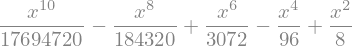

In [5]:
print("Calculating J_1(x) for 5 terms.")
display(series(besselj(1,x),x,0,11).removeO())
print(r"Calculating J_2(x) for 5 terms.")
display(series(besselj(2,x),x,0,11).removeO())

### 5. Integrate $\displaystyle \int_0^\infty x^m e^{-ax} dx $

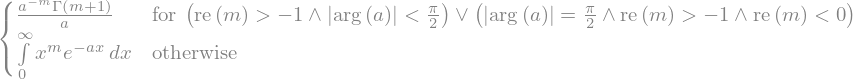

In [6]:
integrate((x**m)*exp(-a*x),(x,0,oo))

### 7. Use sympy to verify the identities involving Pauli Spin Matrices :
$$\displaystyle{\quad[\sigma_x,\sigma_y] = 2i\sigma_z }$$
$$\displaystyle{ \left\{ \sigma_x,\sigma_y\right\} = 0} $$
$$\displaystyle{ \left\{ \sigma_x,\sigma_x\right\} = 2}$$

#### Commutator rules : $\displaystyle{[\sigma_x,\sigma_y] = \sigma_x \sigma_y-\sigma_y \sigma_x , \qquad}$ Anti-Commutator rules : $ \displaystyle{\left\{\sigma_x,\sigma_y\right\} = \sigma_x \sigma_y + \sigma_y \sigma_x }$ ,
    
####  Let us consider:   $\displaystyle{\sigma_x = \large{\sigma}_1 \qquad \sigma_y = \sigma_2 \qquad \sigma_z = \sigma_3} $

In [11]:
from sympy.physics.paulialgebra import Pauli, evaluate_pauli_product
from sympy import I

S0=evaluate_pauli_product(Pauli(1)*Pauli(2)-Pauli(2)*Pauli(1))    # [σ₁, σ₂]
display(Math(r'[\sigma_1,\sigma_2] = '+latex(S0)))

S1=evaluate_pauli_product(Pauli(1)*Pauli(2)+Pauli(2)*Pauli(1))     # {σ₁, σ₂}
display(Math(r'\{\sigma_1,\sigma_2\} = '+latex(S1)))

S2=evaluate_pauli_product(Pauli(1)*Pauli(1)+Pauli(1)*Pauli(1))     # {σ₁, σ₁}
display(Math(r'\{\sigma_1,\sigma_1\} = '+latex(S2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 6. Calculate the matrices $J_x,J_y,J_z$ for and arbitray $j$. 
###     Use the formula for matrix elements of $J_+$ and $J_-$ and generate the matrix.                                      
###     Find out the eigenvalues and eigenvectors of the matrices.

In [3]:
def J_plus_entry(ii, jj, j):
    m1 = j - ii
    m2 = j - jj
    if (m1-m2 == 1):   return sqrt(Rational(j*(j+1)-m2*(m2+1)))
    else:              return 0
    
def J_minus_entry(ii, jj, j):
    m1 = j - ii
    m2 = j - jj
    if (m2-m1 == 1):   return sqrt(Rational(j*(j+1)-m2*(m2-1)))
    else:              return 0
    
def J_z_entry(ii, jj, j):
    m1 = j - ii
    m2 = j - jj
    if (m1 == m2):     return Rational(m1)
    else:              return 0   
    
def compute_matrix(j, entry):
    dim = int(2*j+1)
    entries = []
    for ii in range(dim):
        row = []
        for jj in range(dim):
            row.append(entry(ii, jj, j))
        entries.append(row)
    return entries 

def compute_Js(j):
    J_plus = Matrix(compute_matrix(j, J_plus_entry))
    J_minus =  Matrix(compute_matrix(j, J_minus_entry))
    J_x = (J_plus+J_minus)/2
    J_y = (J_plus-J_minus)/2j
    J_z = Matrix(compute_matrix(j, J_z_entry))
    display(Math(r'J_x = '+latex(J_x)))
    display(Math(r'Eigenvectors : J_x = '+latex(J_x.eigenvects())))
    display(Math(r'J_y = '+latex(J_y)))
    display(Math(r'Eigenvectors : J_y = '+latex(J_y.eigenvects())))
    display(Math(r'J_z = '+latex(J_z)))
    display(Math(r'Eigenvectors : J_z = '+latex(J_z.eigenvects())))
    
A=[1/2,3/2,5/2]
for j in A:
    display(Math(r' j = '+latex(j)))
    compute_Js(j)
    print('__________________________________________________________________________________________________________')    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

__________________________________________________________________________________________________________


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

__________________________________________________________________________________________________________


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

__________________________________________________________________________________________________________


# $${\textbf{Assignment 3}}$$

## $\text{ Find  } : $
### $ \qquad a) \text{ the general solution, and } $
### $ \qquad b) \text{ particular solution corresponding to the given initial condition (using ics option), and }$
### $ \qquad c) \text{ plot the particular solution for an appropriate interval for each of the following problems.} $

## Q1. $ \displaystyle{\frac{d x}{d t} + 5xt =0 \qquad x(0)=\pi} $

Eq(Derivative(x(t), t), -5*t*x(t))


 general soln. :


Eq(x(t), C1*exp(-5*t**2/2))


 particular soln. :



Eq(x(t), pi*exp(-5*t**2/2))

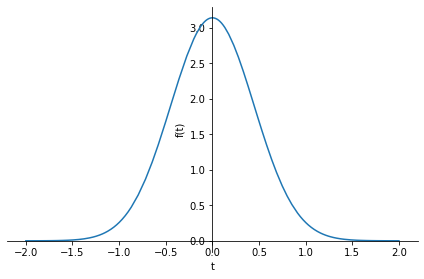

In [8]:
t=symbols('t',real=True)
x=Function('x')(t)

dxdt=x.diff(t)
eq1=Eq(dxdt,-5*x*t)
display(eq1)

s11=dsolve(eq1)
print('\n general soln. :')
display(s11)

s12=dsolve(eq1, ics={x.subs(t,0):pi})
print('\n particular soln. :\n')
display(s12)
plot(s12.rhs,(t,-2,2))

## Q2. $ \displaystyle{ \frac{d x}{d t} = x - x^2 \qquad x(0)=\frac{1}{4}}$

Eq(Derivative(x(t), t), -x(t)**2 + x(t))


 general soln. :



Eq(x(t), 1/(C1*exp(-t) + 1))


 particular soln. :



Eq(x(t), 1/(1 + 3.0*exp(-t)))

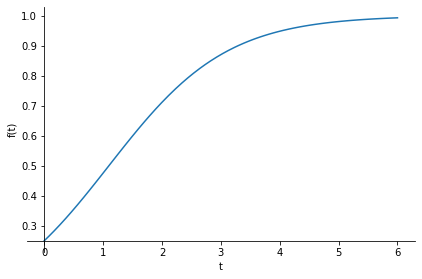

In [9]:
t=symbols('t',real=True)
x=Function('x')(t)

dxdt=x.diff(t)
eq2=Eq(dxdt,(x-x**2))
display(eq2)

s21=dsolve(eq2)
print('\n general soln. :\n')
display(s21)

s22=dsolve(eq2, ics={x.subs(t,0):(1/4)})
print('\n particular soln. :\n')
display(s22)
plot(s22.rhs,(t,0,6),axis_center= (0,0.25))

## Q3. $ \displaystyle{\frac{d x}{d t} = (4t + x)^2 \qquad x(0)=1}$

Eq(Derivative(x(t), t), (4*t + x(t))**2)


 general soln. :



Eq(x(t), t**3*(C1**2*(3*C1**2 + 4) + 12*C1**2 + 16)/3 + t**5*(8*C1**2*(3*C1**2 + 8) + 4*C1**2*(9*C1**2 + 8) + C1**2*(2*C1**2*(3*C1**2 + 8) + C1**2*(9*C1**2 + 8) + 36*C1**2 + 32) + 144*C1**2 + 128)/15 + C1 + C1*t**2*(C1**2 + 4) + C1*t**4*(C1**2*(3*C1**2 + 8) + 12*C1**2 + 32)/3 + C1**2*t + O(t**6))


 particular soln. :



Eq(x(t), 1 + t + 5*t**2 + 35*t**3/3 + 55*t**4/3 + 107*t**5/3 + O(t**6))

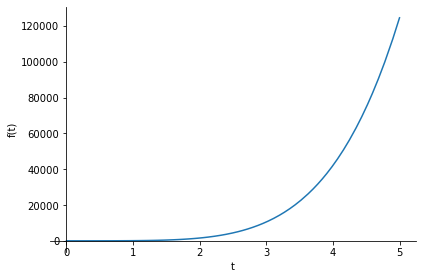

In [10]:
t=symbols('t',real=True)
x=Function('x')(t)

dxdt=x.diff(t)
eq3=Eq(dxdt,((4*t+x)**2))
display(eq3)

s31=dsolve(eq3,hint='1st_power_series')        # taking real part only
print('\n general soln. :\n')
display(s31)

s32=dsolve(eq3,hint='1st_power_series', ics={x.subs(t,0):1})
print('\n particular soln. :\n')
display(s32)
plot(s32.rhs.removeO(),(t,0,5))

## Q4. $ \displaystyle{ \frac{d^2 x}{d t^2} + \frac{d x}{d t} = 0 \qquad x(0)=10,\dot x(0)=3}$

Eq(Derivative(x(t), t) + Derivative(x(t), (t, 2)), 0)


 general soln. :



Eq(x(t), C1 + C2*exp(-t))


 particular soln. :



Eq(x(t), 13 - 3*exp(-t))

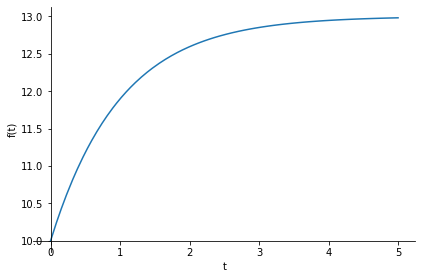

In [11]:
t=symbols('t',real=True)
x=Function('x')(t)

dxdt=x.diff(t)
d2xdt2=x.diff(t,2)
eq4=Eq(d2xdt2+dxdt,0)
display(eq4)

s41=dsolve(eq4)
print('\n general soln. :\n')
display(s41)

s42=dsolve(eq4, ics={x.subs(t,0): 10,x.diff(t).subs(t,0):3})
print('\n particular soln. :\n')
display(s42)
plot(s42.rhs,(t,0,5),axis_center= (0,9.9999))

## Q5. $ \displaystyle{t\frac{d^2 x}{d t^2} + 3\frac{d x}{d t} = 0  \qquad x(1)=1,\dot x(1)=1}$

Eq(t*Derivative(x(t), (t, 2)) + 3*Derivative(x(t), t), 0)


 general soln. :



Eq(x(t), C1 + C2/t**2)


 particular soln. :



Eq(x(t), 3/2 - 1/(2*t**2))

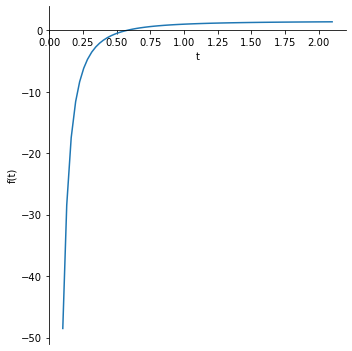

In [12]:
t=symbols('t',real=True)
x=Function('x')(t)

dxdt=x.diff(t)
d2xdt2=x.diff(t,2)
eq5=Eq(t*d2xdt2+3*dxdt,0)
display(eq5)

s51=dsolve(eq5)
print('\n general soln. :\n')
display(s51)

s52=dsolve(eq5, ics={x.subs(t,1): 1,x.diff(t).subs(t,1):1})
print('\n particular soln. :\n')
display(s52)
plot(s52.rhs,(t,0.1,2.1),size=(5,5))

# $${\textbf{Assignment 4}}$$

$ \text{ find }\\ \qquad\qquad
   a) \text{  general solution}, \\ \qquad\qquad
   b) \text{  particular solution corresponding to the given initial condition}, \\ \qquad\qquad
   c) \text{  And plot( for t=0 to 10) x,y as functions of t also the x-y phase track} \\ $
### Q1. $ \displaystyle{\frac{dx}{dt}=x-2y \qquad \frac{dy}{dt}=3x+2y \qquad x(0)=4,y(0)=-3.9}$      


 given equation :



Eq(Derivative(x(t), t), x(t) - 2*y(t))

Eq(Derivative(y(t), t), 3*x(t) + 2*y(t))


 general soln. :



Eq(x(t), -(C1/6 + sqrt(23)*C2/6)*exp(3*t/2)*cos(sqrt(23)*t/2) - (sqrt(23)*C1/6 - C2/6)*exp(3*t/2)*sin(sqrt(23)*t/2))

Eq(y(t), C1*exp(3*t/2)*cos(sqrt(23)*t/2) - C2*exp(3*t/2)*sin(sqrt(23)*t/2))


 particular soln. :



Eq(x(t), -(0.6985232870912 - 0.65*sqrt(23))*exp(3*t/2)*sin(sqrt(23)*t/2) + (0.65 + 0.6985232870912*sqrt(23))*exp(3*t/2)*cos(sqrt(23)*t/2))

Eq(y(t), 4.1911397225472*exp(3*t/2)*sin(sqrt(23)*t/2) - 3.9*exp(3*t/2)*cos(sqrt(23)*t/2))

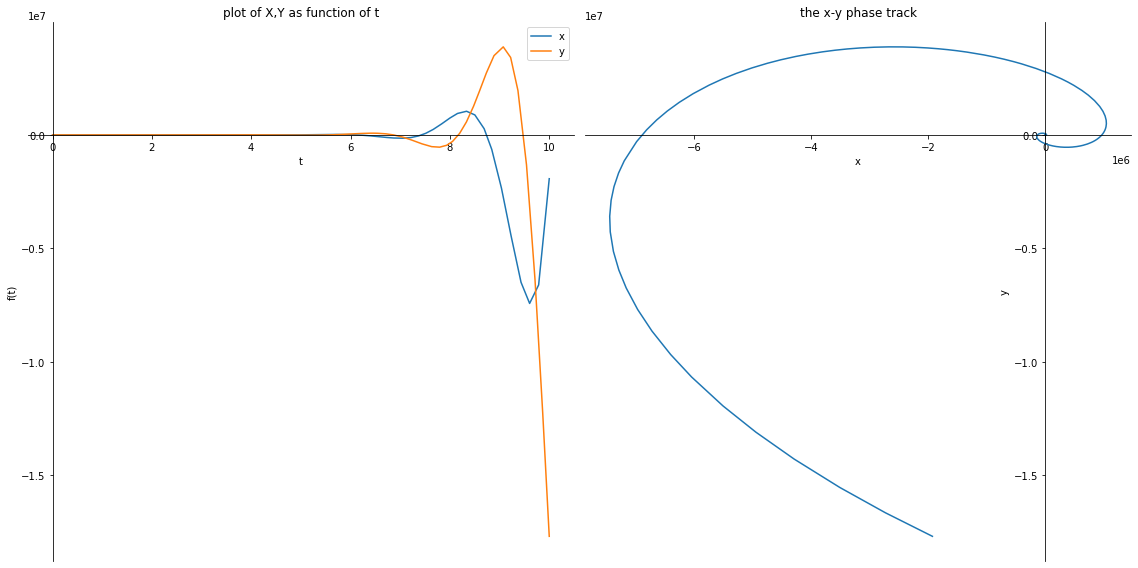

In [13]:
t=symbols('t',real=True)
x=Function('x')(t)
y=Function('y')(t)
dxdt=x.diff(t)
dydt=y.diff(t)

eq11,eq12=Eq(dxdt,x-2*y),Eq(dydt,3*x+2*y)
print('\n given equation :\n')
display(eq11,eq12)

s1=dsolve([eq11,eq12])
print('\n general soln. :\n')
display(*s1)

s2=dsolve([eq11,eq12], ics={x.subs(t,0):4, y.subs(t,0):-3.9})
print('\n particular soln. :\n')
display(*s2)

S01=plot((s2[0].rhs),(t,0,10),legend=True,label=('x'),show=False,title='plot of X,Y as function of t')
S02=plot((s2[1].rhs),(t,0,10),legend=True,label=('y'),show=False)
S01.extend(S02)
S1=plot_parametric((s2[0].rhs,s2[1].rhs),(t,0,10),show=False,axis=True,title='the x-y phase track',xlabel='x',ylabel='y')
PlotGrid(1,2, S01, S1, size=(16,8))

### Q2. $ \displaystyle{ \frac{dx}{dt}=t-ty \qquad \frac{dy}{dt}=2tx \qquad x(0)=5,y(0)=-5}$



 given equation :



Eq(Derivative(x(t), t), -t*y(t) + t)

Eq(Derivative(y(t), t), 2*t*x(t))


 general soln. :



Eq(x(t), -sqrt(2)*C1*sin(sqrt(2)*t**2/2)/2 + C2*cos(sqrt(2)*t**2/2))

Eq(y(t), C1*cos(sqrt(2)*t**2/2) + sqrt(2)*C2*sin(sqrt(2)*t**2/2) + sin(sqrt(2)*t**2/2)**2 + cos(sqrt(2)*t**2/2)**2)


 particular soln. :



Eq(x(t), 2.45*sqrt(2)*sin(sqrt(2)*t**2/2) + 4.0*cos(sqrt(2)*t**2/2))

Eq(y(t), sin(sqrt(2)*t**2/2)**2 + 4.0*sqrt(2)*sin(sqrt(2)*t**2/2) + cos(sqrt(2)*t**2/2)**2 - 4.9*cos(sqrt(2)*t**2/2))

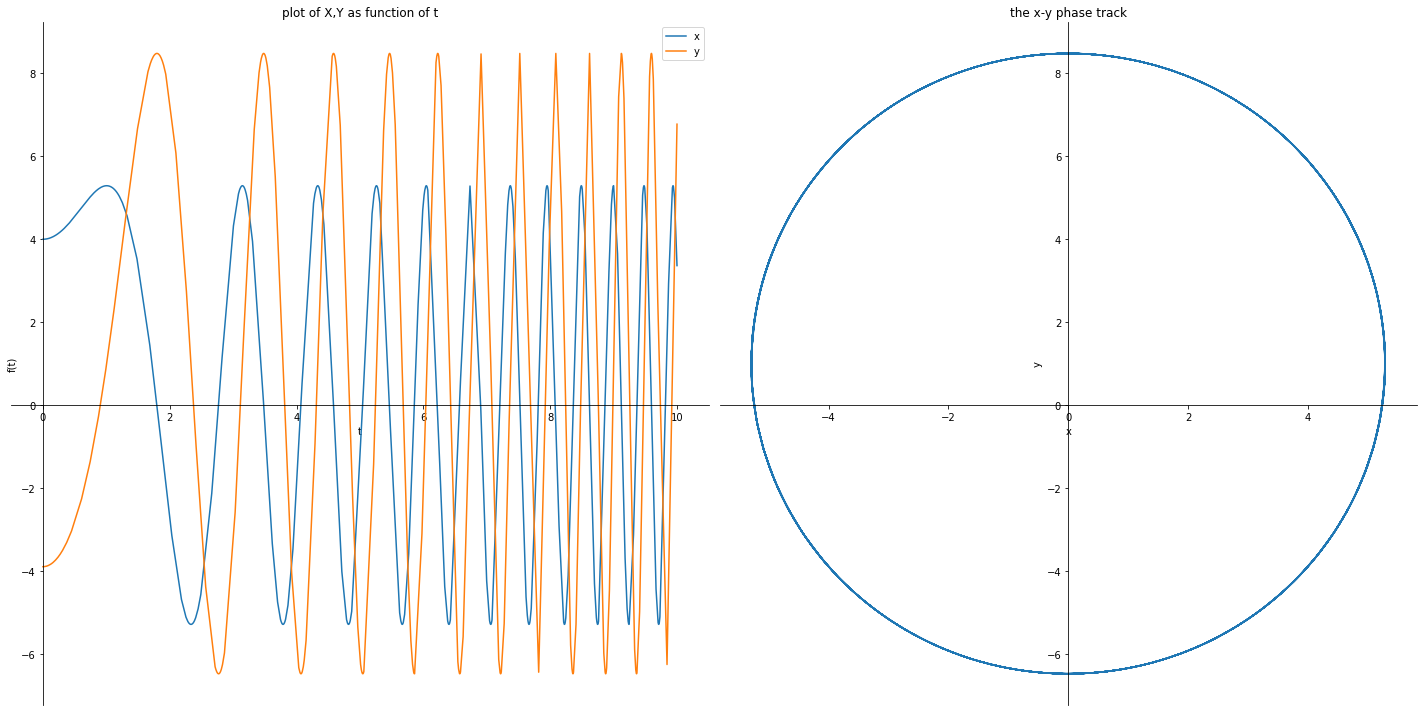

In [14]:
t=symbols('t',real=True)
x=Function('x')(t)
y=Function('y')(t)
dxdt=x.diff(t)
dydt=y.diff(t)

eq21,eq22=Eq(dxdt,t-t*y),Eq(dydt,2*t*x)
print('\n given equation :\n')
display(eq21,eq22)

s1=dsolve([eq21,eq22])
print('\n general soln. :\n')
display(*s1)

s2=dsolve([eq21,eq22], ics={x.subs(t,0):4, y.subs(t,0):-3.9})
print('\n particular soln. :\n')
display(*s2)

S01=plot((s2[0].rhs),(t,0,10),legend=True,label=('x'),show=False,title='plot of X,Y as function of t')
S02=plot((s2[1].rhs),(t,0,10),legend=True,label=('y'),show=False)
S01.extend(S02)
S1=plot_parametric((s2[0].rhs,s2[1].rhs),(t,0,10),show=False,axis=True,title='the x-y phase track',xlabel='x',ylabel='y')
PlotGrid(1,2, S01, S1, size=(20,10))

---------------------------------------------------------------------------------------------------------------------------------